## Importing Required Libraries

This cell imports essential libraries for data analysis, visualization, and custom modules for preprocessing, sentiment analysis, and thematic analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Importing necessary modules
import sys
sys.path.insert(1, '../scripts')
from preprocessors import Preprocessor
from sentiment_analyzer import SentimentAnalyzer as SA
from thematic_analyzer import ThematicAnalyzer as TA

/home/est-lul/Documents/Projects/customer-experience-analytics/.venv/lib64/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setting Up Progress Bars

This cell sets up the tqdm progress bar for pandas operations to monitor the progress of long-running tasks.

In [2]:
from tqdm import tqdm
tqdm.pandas()

## Loading the Dataset

This cell loads the customer reviews dataset for the Commercial Bank of Ethiopia from a CSV file.

In [3]:
try:
    # Load the dataset
    df = pd.read_csv('../../data/Dashen_Bank_reviews.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred: {e}")
    exit(1)

In [4]:
print(df.shape)
df.head()

(448, 6)


,review_text,rating,date,bank_name,source,user_name
0,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play,Masersha
1,wow,5,2025-06-03,Dashen Bank,Google Play,Koki Mulugeta
2,gadaa,5,2025-06-01,Dashen Bank,Google Play,Badhasa Dassaalany
3,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,Nebiyu Getachew Mamo
4,good,4,2025-05-31,Dashen Bank,Google Play,Mudin said


# Initializing the Preprocessor

This cell initializes the text preprocessor, which will be used for language detection and text cleaning.

In [5]:
# Initialize the preprocessor
preprocessor = Preprocessor()

[nltk_data] Downloading package punkt to /home/est-lul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/est-
[nltk_data]     lul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/est-lul/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/est-
[nltk_data]     lul/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /home/est-
[nltk_data]     lul/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Detecting Language of Reviews

This cell detects the language of each review using the preprocessor and adds the result as a new column.

In [6]:
# Detecting language of the reviews
df['language'] = df['review_text'].progress_apply(preprocessor.detect_language)
df.head()

100%|██████████| 448/448 [09:00<00:00,  1.21s/it]


,review_text,rating,date,bank_name,source,user_name,language
0,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play,Masersha,UNKNOWN
1,wow,5,2025-06-03,Dashen Bank,Google Play,Koki Mulugeta,pl
2,gadaa,5,2025-06-01,Dashen Bank,Google Play,Badhasa Dassaalany,so
3,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play,Nebiyu Getachew Mamo,en
4,good,4,2025-05-31,Dashen Bank,Google Play,Mudin said,so


## Filtering Out Unknown Languages

This cell removes reviews where the language could not be detected.

In [7]:
# Filter out rows where language detection failed
df = df[df['language'] != 'UNKNOWN'].copy()
print(df.shape)

(432, 7)


## Plotting Rating Distribution

This cell visualizes the distribution of ratings in the dataset using a bar chart.

<Axes: title={'center': 'Rating Distribution'}, xlabel='rating'>

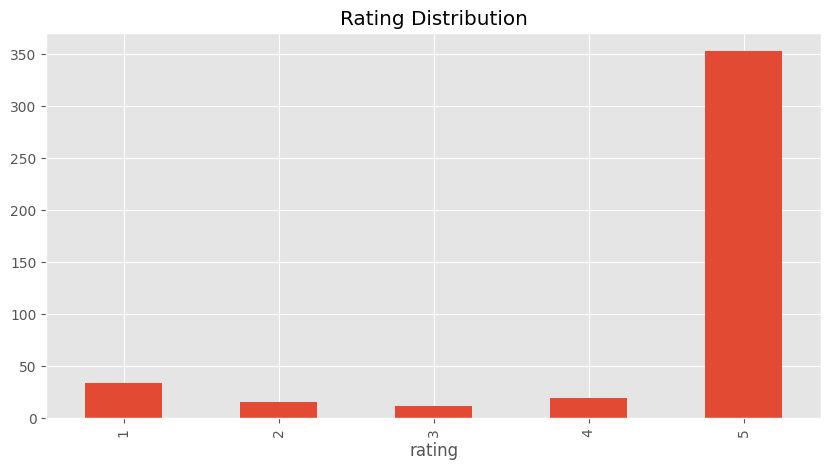

In [8]:
# Plotting the distribution of ratings
df['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution', figsize=(10, 5))

## Preprocessing Review Text

This cell applies text preprocessing (such as cleaning and normalization) to each review.

In [9]:
# Apply preprocessing to the review text
df['processed_text'] = df['review_text'].progress_apply(preprocessor.preprocess_text)

100%|██████████| 432/432 [00:02<00:00, 168.19it/s]


## Initializing Sentiment Analyzer

This cell initializes the sentiment analyzer for further sentiment analysis tasks.

In [11]:
# Initialize the sentiment analyzer
sa = SA()

## Applying TextBlob Sentiment Analysis

This cell applies TextBlob sentiment analysis to the processed reviews and displays the sentiment distribution.

In [12]:
# Apply TextBlob sentiment analysis
df['textblob_sentiment'] = df['processed_text'].progress_apply(sa.get_textblob_sentiment)

# Display sentiment distribution
print(df['textblob_sentiment'].value_counts())

100%|██████████| 432/432 [00:00<00:00, 6254.69it/s]

textblob_sentiment
positive    336
neutral      70
negative     26
Name: count, dtype: int64


## Applying VADER Sentiment Analysis

This cell applies VADER sentiment analysis to the reviews and displays the sentiment distribution.

In [13]:
# Apply VADER sentiment analysis
df['vader_sentiment'] = df['review_text'].progress_apply(sa.get_vader_sentiment)

# Display VADER sentiment distribution
print(df['vader_sentiment'].value_counts())

100%|██████████| 432/432 [00:01<00:00, 247.57it/s]

vader_sentiment
positive    330
neutral      79
negative     23
Name: count, dtype: int64


## Applying DistilBERT Sentiment Analysis

This cell applies DistilBERT sentiment analysis to the reviews and displays the sentiment distribution.

In [14]:
# Apply DistilBERT sentiment analysis
df['distilbert_sentiment'] = df['review_text'].progress_apply(sa.get_distilbert_sentiment)

# Display DistilBERT sentiment distribution
print(df['distilbert_sentiment'].value_counts())

100%|██████████| 432/432 [00:12<00:00, 33.77it/s]

distilbert_sentiment
POSITIVE    344
NEGATIVE     88
Name: count, dtype: int64


In [15]:
df.sample(10)

,review_text,rating,date,bank_name,source,user_name,language,processed_text,textblob_sentiment,vader_sentiment,distilbert_sentiment
219,Wow! like his name Super App...,5,2025-04-21,Dashen Bank,Google Play,Habtamu Tasew,af,wow like name super app,positive,positive,POSITIVE
293,I wanted to share some concerns about your Sup...,1,2025-03-19,Dashen Bank,Google Play,Abdul Omar,en,wanted share concern supper app appears experi...,negative,positive,NEGATIVE
373,Nice,5,2025-01-25,Dashen Bank,Google Play,Nabyat Teshome,ro,nice,positive,positive,POSITIVE
399,The most good app and easy,5,2025-01-16,Dashen Bank,Google Play,Nana Anna,en,good app easy,positive,positive,POSITIVE
168,"Dashen SuperApp blends finance, shopping, and ...",5,2025-04-21,Dashen Bank,Google Play,Mikiyas,en,dashen superapp blend finance shopping daily s...,positive,positive,POSITIVE
104,"Exceptional digital experience, SupperApp will...",5,2025-04-22,Dashen Bank,Google Play,Yemisrach Aber Olana,en,exceptional digital experience supperapp bring...,positive,neutral,POSITIVE
106,fast &Friendly user Application.,5,2025-04-22,Dashen Bank,Google Play,addisu tewolegn,en,fast friendly user application,positive,neutral,POSITIVE
246,it's samart,5,2025-04-10,Dashen Bank,Google Play,Mickey Esrom,tl,samart,neutral,neutral,POSITIVE
383,Ok,5,2025-01-21,Dashen Bank,Google Play,EGATA ARARSO TEFERA,af,ok,positive,positive,POSITIVE
166,"This Is An Amazing App with Uniqe Quality,Easy...",5,2025-04-21,Dashen Bank,Google Play,Tesfaye Abera,en,amazing app uniqe quality easy fast mobile ban...,positive,positive,POSITIVE


## Sentiment Count per Rating

This cell creates a barplot showing the count of each sentiment (positive, negative, etc.) per rating.

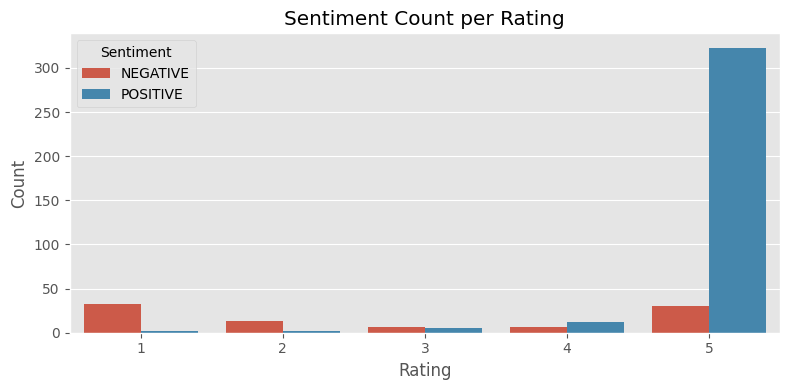

In [16]:
# Plotting the sentiment distribution for distilBERT
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='rating', hue='distilbert_sentiment')
plt.title('Sentiment Count per Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Initializing Thematic Analyzer and Extracting Keywords

This cell initializes the thematic analyzer and extracts the top keywords from the processed reviews.

In [17]:
# Initialize the thematic analyzer
ta = TA()
# Get top keywords
keywords = ta.get_keywords(df['processed_text'])
print("Top keywords:", keywords)

Top keywords: ['able' 'account' 'ahead' 'also' 'always' 'always one' 'amazing'
 'amazing app' 'app' 'app ever' 'application' 'bank' 'bank super'
 'banking' 'banking app' 'best' 'best app' 'bill' 'budget' 'changer'
 'chat' 'convenient' 'customer' 'dashen' 'dashen bank' 'dashen super'
 'design' 'digital' 'digital banking' 'easily' 'easy' 'easy use'
 'ethiopian' 'ever' 'everything' 'excellent' 'experience' 'fast' 'feature'
 'financial' 'friendly' 'good' 'good app' 'great' 'highly'
 'highly recommended' 'incredibly' 'interface' 'keep' 'life' 'like' 'love'
 'make' 'many' 'mobile' 'mobile banking' 'money' 'need' 'new' 'nice' 'one'
 'one place' 'one step' 'option' 'payment' 'place' 'platform' 'really'
 'recommended' 'reliable' 'seamless' 'secure' 'security' 'service'
 'shopping' 'simple' 'slow' 'smooth' 'speed' 'step' 'step ahead' 'super'
 'super app' 'superapp' 'supper' 'supper app' 'telebirr' 'time'
 'transaction' 'transfer' 'truly' 'use' 'used' 'user' 'user friendly'
 'using' 'well' 'work'

## Extracting Top N-Gram Keywords

This cell extracts and displays the top bi-gram and tri-gram keywords from the processed reviews.

In [18]:
# Get top N-gram keywords
bi_grams = ta.get_keywords(df['processed_text'], top_n=20, ngram_range=(2, 3))
print("Top N-Gram Keywords: ", bi_grams)

Top N-Gram Keywords:  ['always one' 'always one step' 'amazing app' 'app ever' 'bank super'
 'bank super app' 'banking app' 'best app' 'dashen bank'
 'dashen bank super' 'dashen super' 'dashen super app' 'digital banking'
 'easy use' 'mobile banking' 'one step' 'one step ahead' 'step ahead'
 'super app' 'supper app']


## Extracting Keywords from Positive and Negative Reviews

This cell extracts and displays the top keywords found in positive and negative reviews separately.

In [19]:
positive_reviews = df[df['distilbert_sentiment'] == 'POSITIVE']['processed_text']
negative_reviews = df[df['distilbert_sentiment'] == 'NEGATIVE']['processed_text']

positive_keywords = ta.get_keywords(positive_reviews, top_n=10)
print("Top keywords in positive reviews:", positive_keywords)

negative_keywords = ta.get_keywords(negative_reviews, top_n=10)
print("Top keywords in negative reviews:", negative_keywords)

Top keywords in positive reviews: ['app' 'bank' 'banking' 'best' 'dashen' 'dashen bank' 'good' 'one' 'super'
 'super app']
Top keywords in negative reviews: ['app' 'bank' 'banking' 'dashen' 'good' 'need' 'slow' 'time' 'transaction'
 'work']


## Word Cloud for Positive Reviews

This cell generates and displays a word cloud for positive reviews.

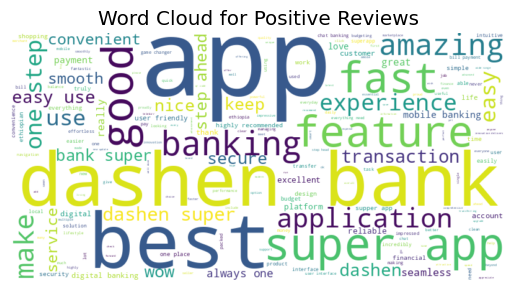

In [20]:
from wordcloud import WordCloud
# Word cloud for positive reviews
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Word Cloud for Negative Reviews

This cell generates and displays a word cloud for negative reviews.

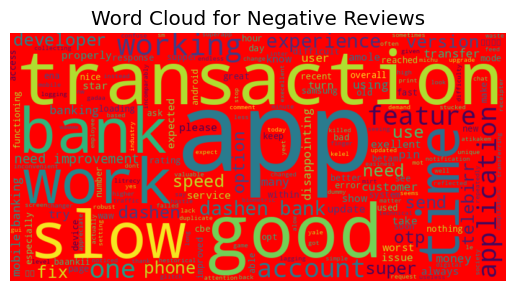

In [21]:
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

## Assigning Themes to Reviews

This cell assigns thematic labels to each review and displays the results.

In [22]:
# Assigning themes to the reviews
df["themes"] = df["processed_text"].progress_apply(ta.assign_theme)
print(df[["review_text", "themes"]])

100%|██████████| 432/432 [00:00<00:00, 284627.60it/s]

                                           review_text   themes
1                                                  wow  [Other]
2                                                gadaa  [Other]
3                  Massive upgrade from the Amole app.  [Other]
4                                                 good  [Other]
5                               very good for this app  [Other]
..                                                 ...      ...
443                                               Best  [Other]
444  Waw Great and innovated,user friendly, always ...  [Other]
445                                   It's Best waww 🙏  [Other]
446                              Always one step ahead  [Other]
447       Like Me, I Hope It Works Better Than Before.  [Other]

[432 rows x 2 columns]


## Saving the final dataframe

This cell saves the processed dataframe, which now includes sentiment and thematic analysis results, to a CSV file for future use or further analysis.

In [23]:
try:
    df.to_csv('../../data/dashen_reviews_with_sentiment_and_themes.csv', index=False)
except Exception as e:
    print(f"An error occurred while saving the DataFrame: {e}")
    exit(1)